<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/07_CNN-cat_Vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle

In [1]:
# to download the kaggle dataset we can use the kaggle api
! pip install --quiet kaggle

Next, you need to download your Kaggle API credentials file from the Kaggle website. To do this, go to your Kaggle account settings (https://www.kaggle.com/account), scroll down to the "API" section, and click on the "Create New API Token" button. This will download a file called kaggle.json to your local machine.

1. upload the file in the root directory  
```!kaggle datasets download -d dataset_name```

2. define the username and key in the code
  1. ```
  import os
os.environ['KAGGLE_USERNAME'] = 'your_kaggle_username'
os.environ['KAGGLE_KEY'] = 'your_kaggle_api_key'
```
  2. ```
  import os
  import getpass
  kaggle_username = getpass.getpass('Enter your Kaggle username:')
  kaggle_key = getpass.getpass('Enter your Kaggle API key:')
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_key
```




In [2]:
import os
import getpass

# kaggle_username = getpass.getpass('Enter your Kaggle username:')
# kaggle_key = getpass.getpass('Enter your Kaggle API key:')

os.environ['KAGGLE_USERNAME'] = "zahraarabi"
os.environ['KAGGLE_KEY'] = "98058a0bdd515ead920eb75fbc5348f7"

In [3]:
! kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:43<00:00, 19.9MB/s]
100% 812M/812M [00:43<00:00, 19.7MB/s]


In [ ]:
! unzip dogs-vs-cats.zip

# to unzip to a new file > unzip test1.zip -d test
! unzip train.zip
! unzip test1.zip

! mv -f test1 test

# Dataset

https://www.kaggle.com/c/dogs-vs-cats/data  
This is a real dataset of some cat and dog images.
1. the size are not the same
2. the images are in different environments with different resolutions  
3. the images are in Disk > if we want to load all of them in RAM, it takes too much space

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

For reading the images from Disk to RAM, Keras has Image Data Generator approach.  
In thi approach the folders must obey the specific hierarical tructure.
1. train
  - class1
  - class2
  - ...
2. test
  - class1
  - class2
  - ...

In [5]:
import os, shutil

In [6]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'train'

# The directory where we will
# store our smaller dataset
base_dir = 'catVsdog'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [7]:
# Copy first 1000 cat images to train_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = [f'dog.{i}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
train_cats_dir

'catVsdog/train/cats'

In [9]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


<class 'numpy.ndarray'>
(300, 205, 3)
255 0
uint8


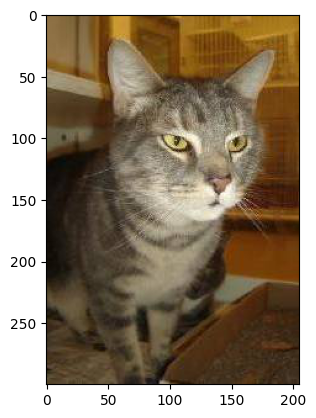

In [10]:
import matplotlib.pyplot as plt

img = plt.imread(os.path.join(train_cats_dir,
                              os.listdir(train_cats_dir)[0]))

print(type(img))
print(img.shape)
print(img.max(), img.min())
print(img.dtype)

plt.imshow(img)

# Model Architecture

1. The images are different sizes > So we have to reshape them to one unique size.   
What size is the best? [hyperparameter] 
The higher the size is the more complex the model will be.
2. In the last layer
  - If we have more than 2 class > ``` model.add(layers.Dense(num, activation='softmax')) ```
  - If we have a binary classification: 
    1. ``` model.add(layers.Dense(1, activation='sigmoid')) ```
    2. ``` model.add(layers.Dense(2, activation='softmax')) ```




In [11]:
from keras import layers
from keras import models

model = models.Sequential()
# input_shape? hyperparameter
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
from keras import optimizers

# Since we ended our network with a single sigmoid unit, we will 
# use binary crossentropy as our loss
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Generator

The data is too many images that take lot of space in RAM. So we need to grab a part of them, process on them, and keep going with another portion of them.  
We have two main ideas in python. 

1. function  
run and ends  
may has an return or not  
each time same response and behaviour

2. generator  
instead of "return" we write "yield"  
it has a memory  
with every call it returns the next response


In [14]:
import time

def time_it(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Elapsed time: {end_time - start_time:.5f} seconds")
        return result
    return wrapper

In [15]:
def fibonacci_rec(n):
  if n == 0 or n == 1:
    return n
  return fibonacci_rec(n-1) + fibonacci_rec(n-2)

t1 = time.time()
f = fibonacci_rec(30)
t2 = time.time()
print(f"{f} is the result and it takes {t2-t1} seconds")

832040 is the result and it takes 0.2734541893005371 seconds


In [16]:
'''
yield allows the function to return a value without actually 
exiting the function. Instead, the function is paused at the 
point where yield is called, and the value is returned to the caller. 
The next time the function is called, it resumes execution from the 
point where it left off, continuing to execute until it reaches the 
next yield statement or until the function exits.
'''
def generate_numbers():
    for i in range(5):
        yield i

numbers = generate_numbers()

number_list = list(numbers)
print(number_list)

numbers = generate_numbers()
count = 0
for num in numbers:
    count += 1
print(f"the count is {count}")

numbers = generate_numbers()
for num in numbers:
    print(num, end=" ")

numbers = generate_numbers()
print("first number ", next(numbers))
print("second number ", next(numbers))
print("third number ",next(numbers))

[0, 1, 2, 3, 4]
the count is 5
0 1 2 3 4 first number  0
second number  1
third number  2


In [17]:
def gen(a):
  while(True):
    yield a * 10
    a = a+1

a = gen(3)
print(next(a), next(a), next(a))

30 40 50


In [18]:
def fibonacci(n):
    a, b = 0, 1
    # yeild must be in for or while(True)
    for i in range(n+1):
        yield a
        a, b = b, a + b

fib = fibonacci(10)
print(next(fib), next(fib), next(fib))

fib = fibonacci(30)
print(list(fib)[-1])

fib = fibonacci(30)
for i in range(31):
  print(next(fib), end=" ")

print("***")

fib = fibonacci(30)
for i in fib:
  print(i, end=" ")

0 1 1
832040
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 ***
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 

# Image Generator

In [19]:
# it is not best practice!!!
from keras.preprocessing.image import ImageDataGenerator

# preprocessing
# All images will be rescaled by 1./255 > dtype=float
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory > mut have the special tree
        train_dir,
        # All images will be resized to 150x150 > 150*150*num_channels
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        # categorical - label as one hot, binary - lable as 0 and 1
        class_mode='binary')
# shuffle=True > default

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary 
labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches 
indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop 
at some point.

In [20]:
# print(len(list(train_generator)))

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break 

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let's fit our model to the data using the generator. We do it using the `fit_generator` method, the equivalent of `fit` for data generators 
like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 
Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

When using `fit_generator`, one may pass a `validation_data` argument, much like with the `fit` method. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

In [21]:
# we have 2000 train, 1000 from each class > 2000/20=100
# validation > 1000 total, 500 each class > 1000/20=50
# fit_generator is depricated > use fit instead > fit supports both normal and generative dataset
history = model.fit(
      train_generator,
      # in fit the iteration is calculated automatically, but here we have to indicate
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 104ms/step - loss: 0.6845 - acc: 0.5490 - val_loss: 0.6742 - val_acc: 0.5380
Epoch 2/30
100/100 [==============================] - 10s 103ms/step - loss: 0.6482 - acc: 0.6110 - val_loss: 0.6378 - val_acc: 0.6200
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6091 - acc: 0.6655 - val_loss: 0.6040 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 9s 94ms/step - loss: 0.5659 - acc: 0.6960 - val_loss: 0.6001 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 10s 101ms/step - loss: 0.5392 - acc: 0.7285 - val_loss: 0.5730 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 10s 103ms/step - loss: 0.5041 - acc: 0.7525 - val_loss: 0.5953 - val_acc: 0.6720
Epoch 7/30
100/100 [==============================] - 11s 113ms/step - loss: 0.4705 - acc: 0.7735 - val_loss: 0.5954 - val_acc: 0.6790
Epoch 8/30
100/100 [==============================] - 10s

Let's plot the loss and accuracy of the model over the training and validation data during training:

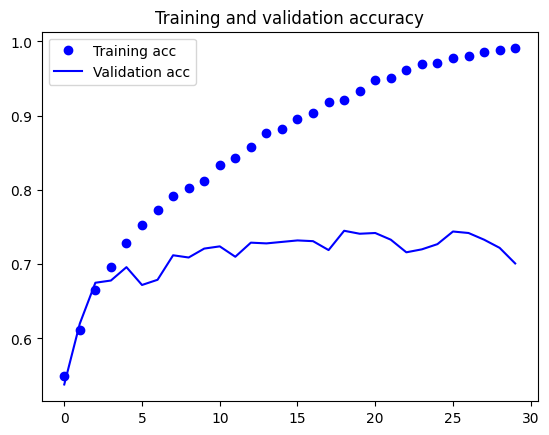

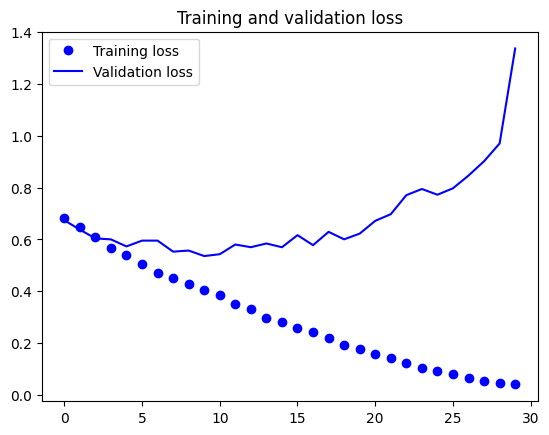

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

###OVERFITTING!!!
# you can use Dropout > but dropout doesn't have significant effect in this problem
# data is not too many

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our 
validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss 
keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern.
Let's train our network using data augmentation and dropout:

# Data preprocessing

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image 
processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to 
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we 
will use here.

`https://keras.io/preprocessing/image/`

# With Dropout

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-23-e5e2d88bf15c>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 11s 94ms/step - loss: 0.6930 - acc: 0.5125 - val_loss: 0.6788 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6642 - acc: 0.6010 - val_loss: 0.6819 - val_acc: 0.5570
Epoch 3/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6358 - acc: 0.6360 - val_loss: 0.6409 - val_acc: 0.6230
Epoch 4/30
100/100 [==============================] - 10s 100ms/step - loss: 0.6008 - acc: 0.6900 - val_loss: 0.6000 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5654 - acc: 0.7070 - val_loss: 0.6075 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5426 - acc: 0.7355 - val_loss: 0.6057 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5208 - acc: 0.7410 - val_loss: 0.5635 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 11s 115ms/ste

Let's plot our results again:

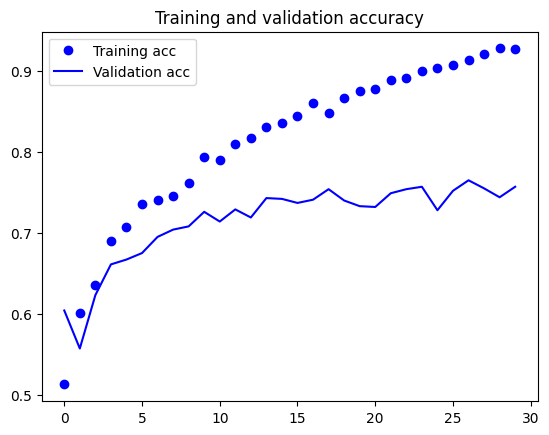

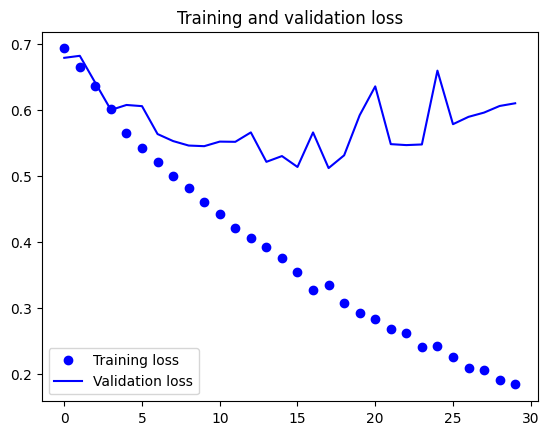

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing Data Augmentation

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Just testing the augmentation and see the results
datagen = ImageDataGenerator(
      # rotate
      rotation_range=40,
      # percentage shift
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      # for randomly flipping 50% of the images horizontally
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures 
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [12]:
''' Data Augmentation doesn't increase the data for us
Just fir each epoch some transformations are applied to input data
in this case the number of train data is constant
But in each epoch we see different images
'''

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[9]

In [14]:
print(img_path)

catVsdog/train/cats/cat.455.jpg


(375, 499, 3)


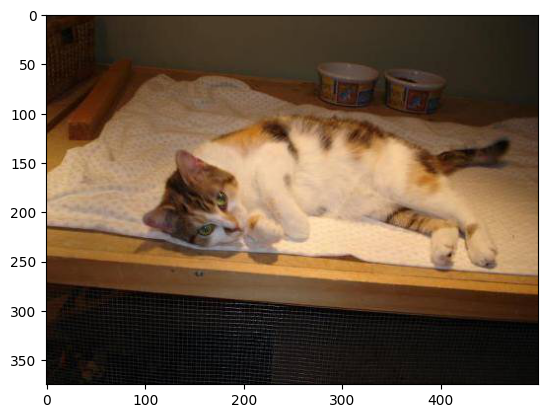

In [17]:
import matplotlib.pyplot as plt

img = plt.imread(img_path)
print(img.shape)
plt.imshow(img)

(150, 150, 3)


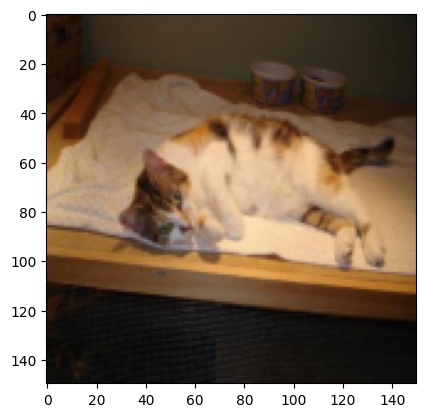

In [19]:
from skimage.transform import resize

new_img = resize(img, (150,150,3))
print(new_img.shape)
plt.imshow(new_img)

<class 'PIL.Image.Image'>


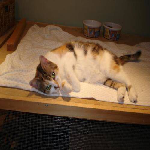

In [25]:
# we have another way
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Python Imaging Library (PIL) 
print(type(img))
img

In [32]:
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
print(x.shape)

# For testing the generator > we need to make the dimension of the NN inputs
# num_samples * width * height * num_channels
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

(150, 150, 3)


(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


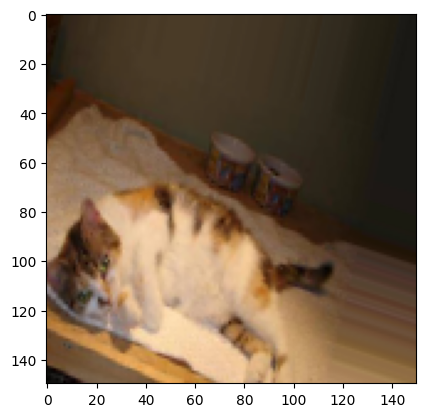

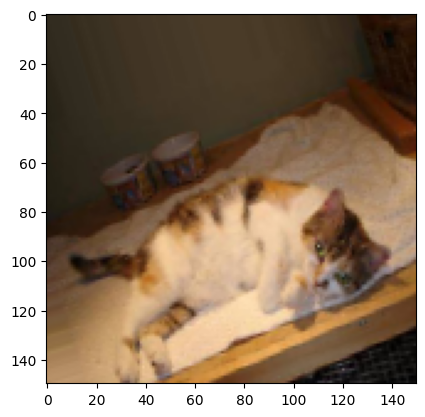

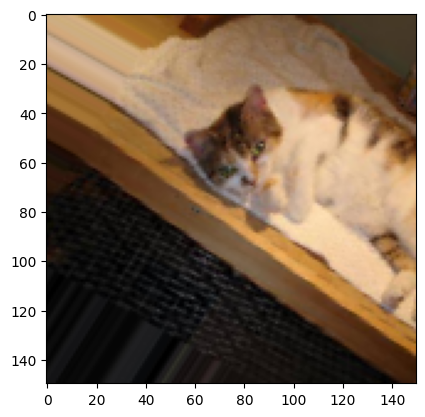

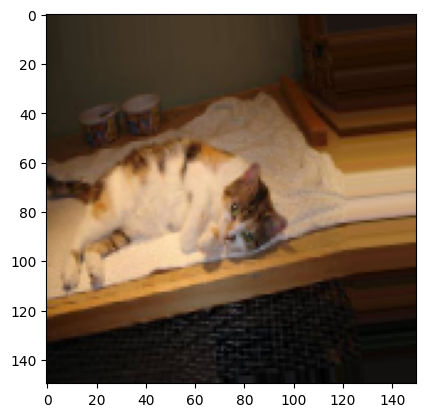

In [34]:
# The .flow() command below generates batches of randomly transformed images.
# target_size is defined while loading, mode is not necessary because we don't want to train

# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    print(batch.shape)
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting.

# Use Data Augmentation in Training
+ with Drouput

In [46]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [47]:
# we need the normalization to give the images as an input > RESCALE
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# 2000 / 32 = 63
# 1000 / 32 = 32
history = model.fit(
      train_generator,
      steps_per_epoch=63,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 [==============================] - 21s 317ms/step - loss: 0.6944 - acc: 0.5130 - val_loss: 0.6873 - val_acc: 0.5010
Epoch 2/30
63/63 [==============================] - 19s 296ms/step - loss: 0.6885 - acc: 0.5265 - val_loss: 0.6963 - val_acc: 0.5000
Epoch 3/30
63/63 [==============================] - 20s 313ms/step - loss: 0.6738 - acc: 0.5715 - val_loss: 0.6596 - val_acc: 0.5940
Epoch 4/30
63/63 [==============================] - 19s 299ms/step - loss: 0.6679 - acc: 0.5905 - val_loss: 0.7714 - val_acc: 0.5100
Epoch 5/30
63/63 [==============================] - 20s 313ms/step - loss: 0.6593 - acc: 0.5920 - val_loss: 0.6362 - val_acc: 0.6240
Epoch 6/30
63/63 [==============================] - 19s 297ms/step - loss: 0.6487 - acc: 0.6180 - val_loss: 0.6200 - val_acc: 0.6390
Epoch 7/30
63/63 [==============================] - 20s 316ms/step - loss: 0.6379 - acc: 0.6295 - val_loss: 0.6266 - v

+ DATA AUGMENTATION DOESN'T INCREASE THE DATA SIZE. JUST IN EACH EPOCH THE DATA  ARE FED INTO THE NETWORK WITH DIFFERENT TRANSFORMATIONS!!!
+ The data augmentation approaches are hyperparameters. We have to keep the label with transformations. If we overdo it, the train input becomes so hard so the train loss will be more than validation loss. Which is inordinary!!!! [ always the performance must be better in training rather than validation]

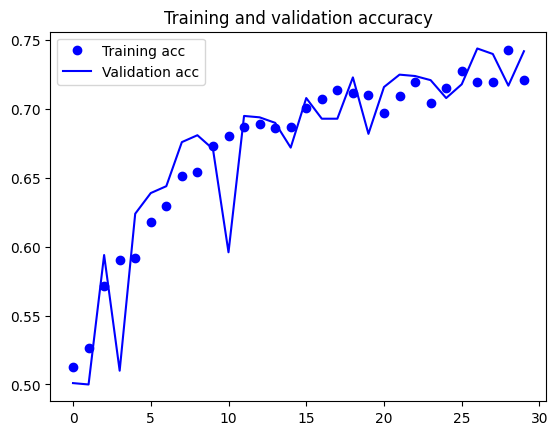

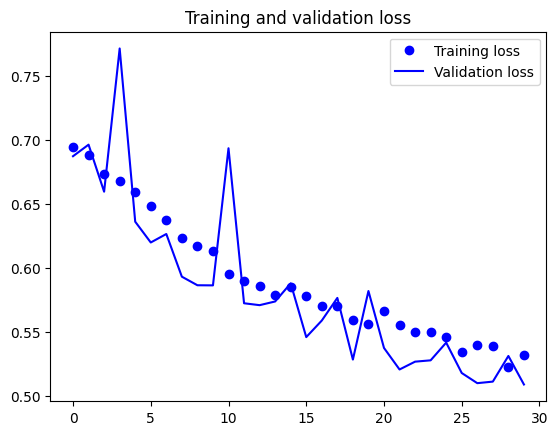

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Save the model


In [49]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [50]:
model.evaluate(test_generator)

32/32 [==============================] - 4s 120ms/step - loss: 0.5456 - acc: 0.7260


[0.5456163883209229, 0.7260000109672546]

In [51]:
# h5py format
model.save('cats_and_dogs_small_1.h5')

In [52]:
from tensorflow.keras.models import load_model

# Load the model
model_loaded = load_model('cats_and_dogs_small_1.h5')

# Use the model for prediction or evaluation
model_loaded.evaluate(test_generator)

32/32 [==============================] - 3s 90ms/step - loss: 0.5456 - acc: 0.7260


[0.5456163883209229, 0.7260000109672546]

1/1 [==============================] - 0s 32ms/step
[[0.80568117]]
1


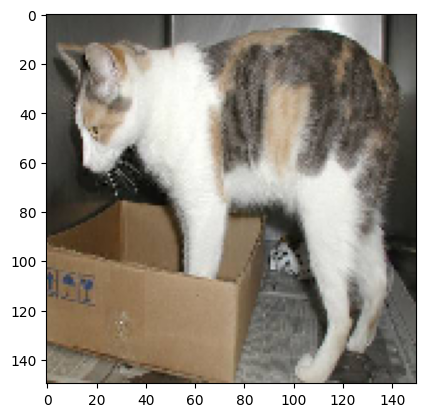

In [67]:
import numpy as np

fnames = [os.path.join(test_cats_dir, fname) for fname in os.listdir(test_cats_dir)]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)

x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)
predicted_output = model.predict(x)
print(predicted_output)
# the output of sigmoid > 1:cat / 0:dog
out = 1 if predicted_output > 0.5 else 0
print(out)

1/1 [==============================] - 0s 31ms/step
[[0.5195874]]
1


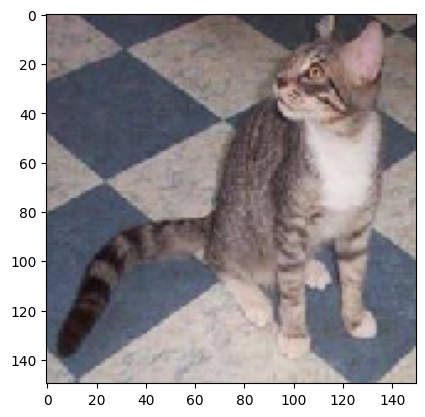

In [72]:
img_path = fnames[110]

img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)

x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)
predicted_output = model.predict(x)
print(predicted_output)
# the output of sigmoid > 1:cat / 0:dog
out = 1 if predicted_output > 0.5 else 0
print(out)